In [1]:
import pandas as pd
import numpy as np
#import sklearn
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
#from pandas.plotting import scattter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "D:\Github\ML\ionosphere\ionosphere.data"
df_ion = pd.read_csv(file_path, delimiter = ',')
df_ion.columns = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10","V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20","V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "V29", "V30","V31", "V32", "V33","V34","Class"]
df_ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,b


# part 1: exploratory data analysis

In [3]:
#find the missing values
df_ion.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [4]:
df_ion['Class'] = df_ion['Class'].map({'g': 0, 'b': 1})
df_ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
2,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
3,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0
4,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,1


<AxesSubplot:>

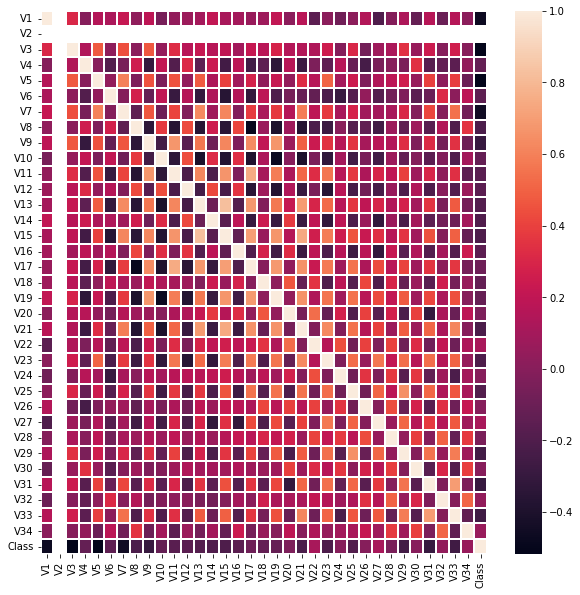

In [5]:
#plot the heatmap to see the correlation between different columns
corrmap = df_ion.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corrmap, ax=ax, linewidth = 0.1)

In [6]:
#check if there is duplicated values
df_ion[df_ion.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
247,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
#drop duplicte value
df_ion.drop_duplicates(keep='last',inplace=True)

In [8]:
#statistics of the data
df_ion.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,349.000000,349.0,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,...,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,0.893983,0.0,0.642165,0.044795,0.602070,0.116487,0.550858,0.121125,0.511916,0.182277,...,-0.070129,0.540702,-0.065748,0.380005,-0.027090,0.353323,-0.002254,0.350832,0.015861,0.358166
std,0.308302,0.0,0.497588,0.442660,0.520181,0.462063,0.492951,0.521523,0.507105,0.485080,...,0.509391,0.517054,0.548928,0.577111,0.509152,0.572799,0.514228,0.523754,0.469009,0.480150
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.473370,-0.066040,0.412870,-0.024940,0.215720,-0.054050,0.087760,-0.049930,...,-0.331450,0.280790,-0.422310,0.000000,-0.236490,0.000000,-0.241800,0.000000,-0.162430,0.000000
50%,1.000000,0.0,0.871110,0.017090,0.809200,0.022800,0.728730,0.015460,0.684210,0.018290,...,-0.015050,0.708240,-0.017680,0.501790,0.000000,0.450980,0.000000,0.416670,0.000000,0.000000
75%,1.000000,0.0,1.000000,0.195270,1.000000,0.335980,0.971650,0.457470,0.951350,0.538190,...,0.159080,0.999890,0.156190,0.885680,0.154360,0.861360,0.201750,0.819790,0.172550,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


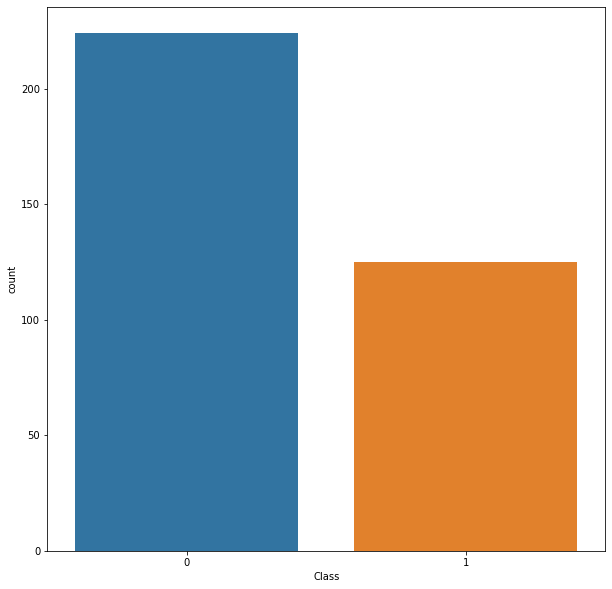

In [9]:
#plot the glass distribution
plt.figure(figsize=(10,10))
sns.countplot(x='Class', data=df_ion, order=df_ion['Class'].value_counts().index);

The above descriptive statistics and plotting of glass types show that this data set is imbalanced. therefore, it needs normalization. 

In [10]:
#create feature and label
#from tensorflow.keras.utils import to_categorical, normalize
X=df_ion.drop('Class',axis=1)
#X=normalize(X)
y=df_ion['Class']

In [11]:
X.shape

(349, 34)

In [12]:
X2 = X.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle = True)

# 2: Decision Tree classification

In [13]:
#before pruning
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)
mse= mean_squared_error(y_test, clf_predict)
mae = mean_absolute_error(y_test, clf_predict)
pre = precision_score(y_test, clf_predict, average = 'weighted')
rec = recall_score(y_test, clf_predict, average = 'weighted')
print("accuracy =", clf_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.7428571428571429
mse= 0.2571428571428571
mae= 0.2571428571428571
pre= 0.7657815691457407
rec= 0.7428571428571429


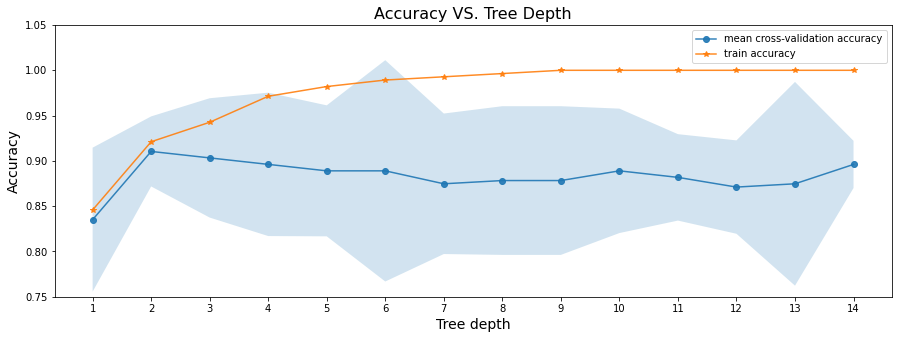

In [19]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    #ylim = plt.ylim()
    ylim = (0.75, 1.05)
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 10
sm_tree_depths = range(1,15)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy VS. Tree Depth')


In [20]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,3), round(sm_best_tree_cv_score_std*100, 3)))

The depth-2 tree achieves the best mean cross-validation accuracy 91.045 +/- 1.933% on training dataset


In [21]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100, 3), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,3), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 3rd tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  2
Accuracy, Training Set:  92.115 %
Accuracy, Test Set:  85.714 %


[Text(257.80673076923074, 209.6742857142857, 'X[7] <= 0.385\ngini = 0.73\nsamples = 169\nvalue = [59, 59, 13, 10, 7, 21]'),
 Text(206.56730769230768, 194.14285714285714, 'X[3] <= 1.405\ngini = 0.678\nsamples = 149\nvalue = [58, 59, 13, 9, 7, 3]'),
 Text(155.59615384615384, 178.61142857142858, 'X[6] <= 10.48\ngini = 0.599\nsamples = 97\nvalue = [54, 27, 11, 1, 2, 2]'),
 Text(122.33076923076922, 163.07999999999998, 'X[2] <= 3.845\ngini = 0.555\nsamples = 87\nvalue = [54, 18, 11, 0, 2, 2]'),
 Text(81.55384615384615, 147.54857142857142, 'X[0] <= 1.517\ngini = 0.505\nsamples = 80\nvalue = [54, 12, 10, 0, 2, 2]'),
 Text(25.753846153846155, 132.01714285714286, 'X[4] <= 72.72\ngini = 0.72\nsamples = 15\nvalue = [3, 4, 6, 0, 1, 1]'),
 Text(17.16923076923077, 116.48571428571428, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5, 0, 0, 0]'),
 Text(34.33846153846154, 116.48571428571428, 'X[0] <= 1.516\ngini = 0.72\nsamples = 10\nvalue = [3, 4, 1, 0, 1, 1]'),
 Text(17.16923076923077, 100.9542857142857, 'X

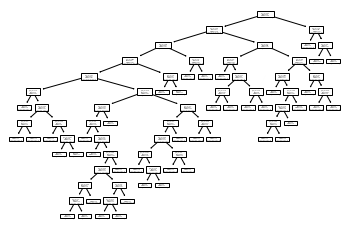

In [18]:
# tree visualization
from sklearn import tree
tree.plot_tree(clf)

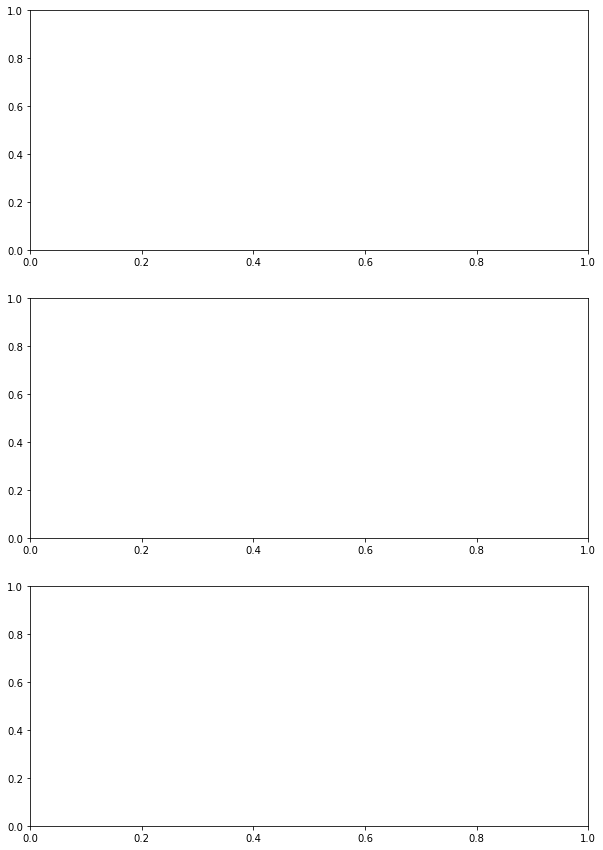

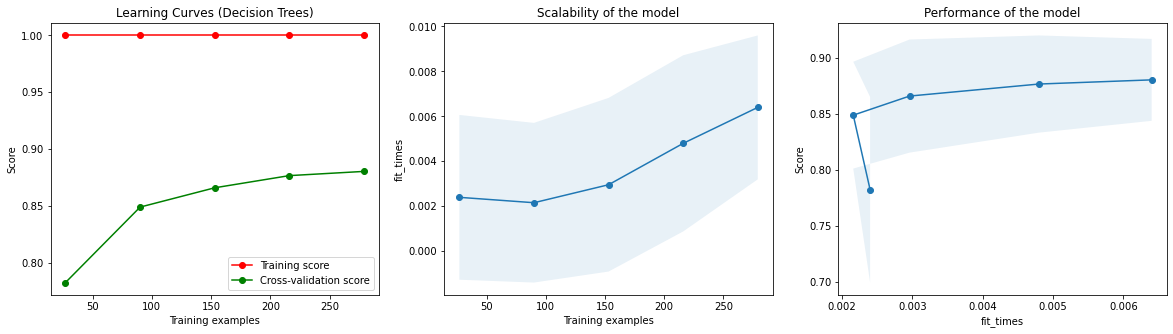

In [22]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Decision Trees)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()


In [32]:
# pruning the tree by setting the max_depth to 2
import time
start = time.time()
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_predict)
mse= mean_squared_error(y_test, clf_predict)
mae = mean_absolute_error(y_test, clf_predict)
pre = precision_score(y_test, clf_predict, average = 'weighted')
rec = recall_score(y_test, clf_predict, average = 'weighted')
print("accuracy =", clf_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print (end - start)

accuracy = 0.8714285714285714
mse= 0.12857142857142856
mae= 0.12857142857142856
pre= 0.8703192640692642
rec= 0.8714285714285714
0.007963418960571289


[Text(133.92000000000002, 181.2, 'X[4] <= 0.146\nentropy = 0.947\nsamples = 279\nvalue = [177, 102]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 58\nvalue = [0, 58]'),
 Text(200.88000000000002, 108.72, 'X[26] <= 1.0\nentropy = 0.72\nsamples = 221\nvalue = [177, 44]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.336\nsamples = 177\nvalue = [166, 11]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.811\nsamples = 44\nvalue = [11, 33]')]

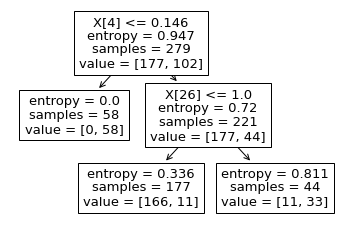

In [31]:
# tree visualization
from sklearn import tree
tree.plot_tree(clf)

# 3: Neural Networks Classification

In [80]:
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'identity')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)


accuracy = 0.8571428571428571
mse= 0.14285714285714285
mae= 0.14285714285714285
pre= 0.8599968289202473
rec= 0.8571428571428571


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
#activation function 'tanh'
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'tanh')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8428571428571429
mse= 0.15714285714285714
mae= 0.15714285714285714
pre= 0.8470238095238096
rec= 0.8428571428571429


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
#activation function 'relu'
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.9023376623376623
rec= 0.8857142857142857


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [83]:
#activation function 'logistic'
mlp = MLPClassifier(hidden_layer_sizes = 10, activation = 'logistic')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8285714285714286
mse= 0.17142857142857143
mae= 0.17142857142857143
pre= 0.845151339888182
rec= 0.8285714285714286


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [84]:
#increase the layer size from 10 to 50
import time
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = 50, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.8919930236245441
rec= 0.8857142857142857
elapsed time: 0.16588783264160156


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [85]:
#increase the layer size from 10 to 100
import time
start = time.time()
mlp = MLPClassifier(hidden_layer_sizes = 100, activation = 'relu')
mlp.fit(X_train, y_train)
mlp_predict = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_predict)
mse= mean_squared_error(y_test, mlp_predict)
mae = mean_absolute_error(y_test, mlp_predict)
pre = precision_score(y_test, mlp_predict, average = 'weighted')
rec = recall_score(y_test, mlp_predict, average = 'weighted')
print("accuracy =", mlp_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.886421937195931
rec= 0.8857142857142857
0.23802876472473145


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


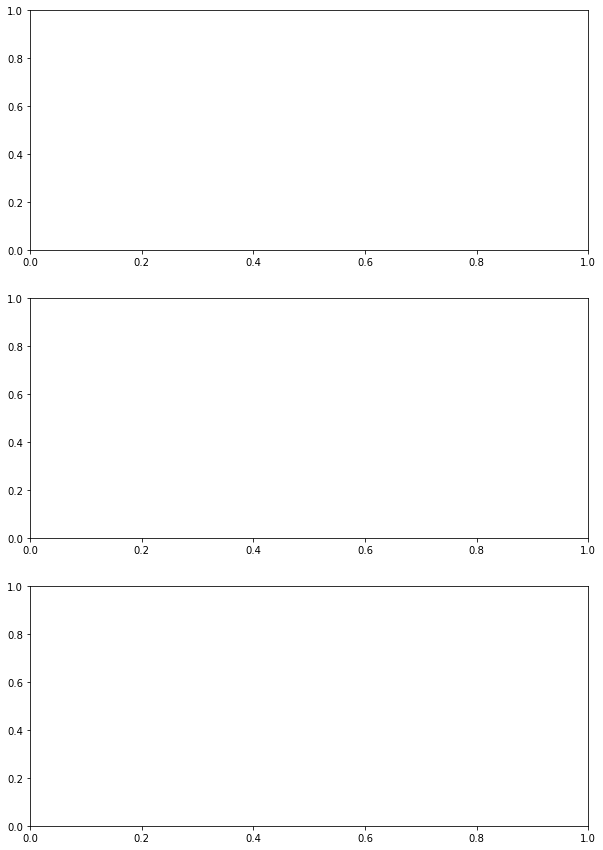

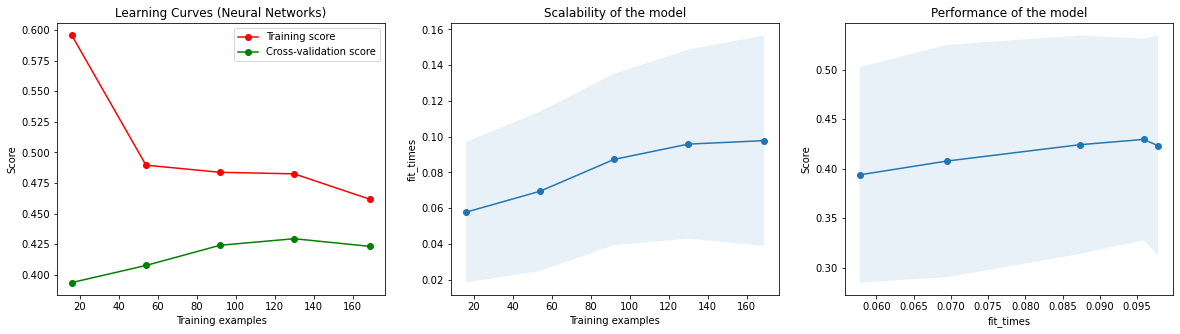

In [28]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Neural Networks)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = MLPClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()


# 4: Boosting

In [41]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8571428571428571
mse= 0.14285714285714285
mae= 0.14285714285714285
pre= 0.8551992225461613
rec= 0.8571428571428571


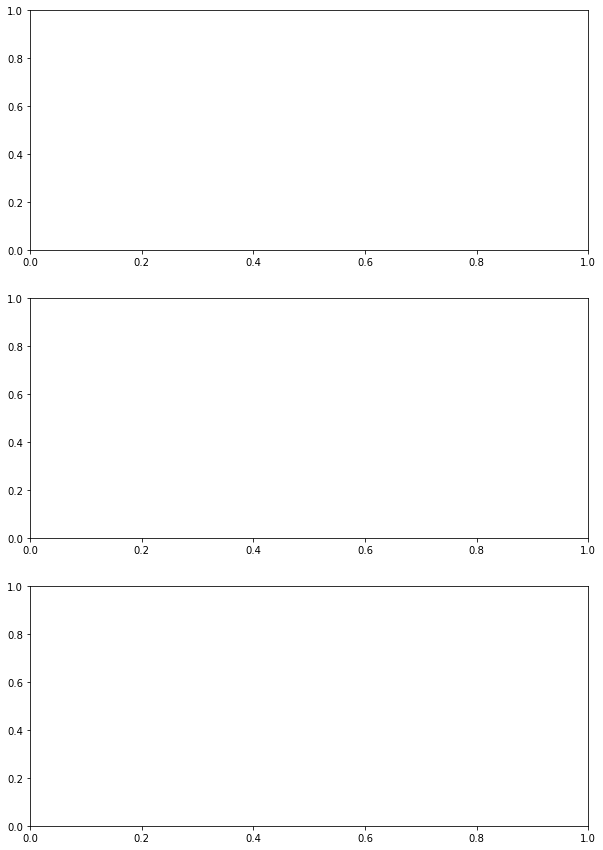

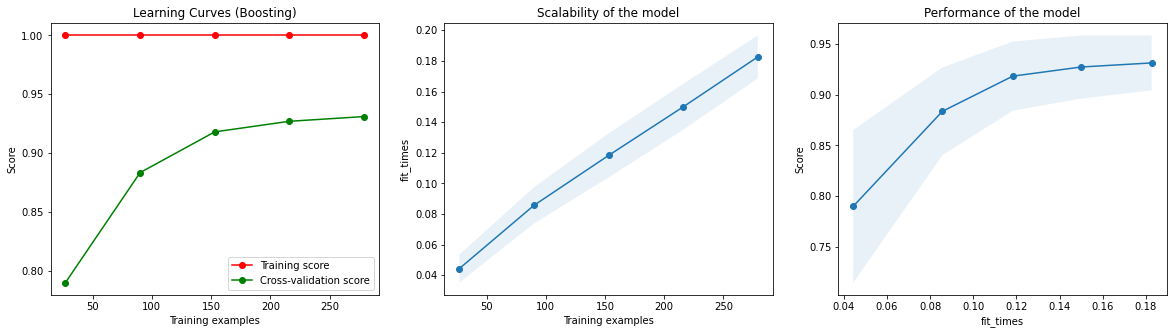

In [42]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times = True)
              
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # Plot learning curve
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes[0].legend(loc="best")
    
     # Plot n_samples vs fit_times
    #axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std, fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    #axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

#fig, (ax1, ax2) = plt.subplots(1, 2)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curves (Boosting)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier()
plot_learning_curve(estimator, title, X, y, axes = None, cv=cv, n_jobs =4)
#plot_learning_curve(estimator, X, y, title, axes = axes[:, 0], cv=cv, train_sizes=np.linspace(.1, 1.0, 5))
#plot_learning_curve(estimator, X, y, ax = ax2, cv=cv, train_sizes=np.linspace(.5, 1.0, 5))

plt.show()

In [86]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 10, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.7714285714285715
mse= 0.22857142857142856
mae= 0.22857142857142856
pre= 0.7846191706656823
rec= 0.7714285714285715


In [87]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8571428571428571
mse= 0.14285714285714285
mae= 0.14285714285714285
pre= 0.8551992225461613
rec= 0.8571428571428571


In [88]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8571428571428571
mse= 0.14285714285714285
mae= 0.14285714285714285
pre= 0.8551992225461613
rec= 0.8571428571428571


In [89]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 2, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.886421937195931
rec= 0.8857142857142857


In [90]:
import time
start = time.time()
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 0)
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, gbc_predict)
mse= mean_squared_error(y_test, gbc_predict)
mae = mean_absolute_error(y_test, gbc_predict)
pre = precision_score(y_test, gbc_predict, average = 'weighted')
rec = recall_score(y_test, gbc_predict, average = 'weighted')
print("accuracy =", gbc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.8919930236245441
rec= 0.8857142857142857
0.06585550308227539


# 5: Support Vector Classification

In [48]:
svc = SVC(C= 1.0, kernel = 'rbf')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.9
mse= 0.1
mae= 0.1
pre= 0.9
rec= 0.9


In [49]:
svc = SVC(C = 0.1)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.8919930236245441
rec= 0.8857142857142857


In [55]:
import time
start = time.time()
svc = SVC(C = 100)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print (end - start)

accuracy = 0.8857142857142857
mse= 0.11428571428571428
mae= 0.11428571428571428
pre= 0.886421937195931
rec= 0.8857142857142857
0.007998943328857422


In [51]:
svc = SVC(C = 1000)
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8428571428571429
mse= 0.15714285714285714
mae= 0.15714285714285714
pre= 0.8402857142857144
rec= 0.8428571428571429


In [52]:
svc = SVC(C= 1.0, kernel = 'linear')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8714285714285714
mse= 0.12857142857142856
mae= 0.12857142857142856
pre= 0.8731074481074481
rec= 0.8714285714285714


In [53]:
svc = SVC(C= 1.0, kernel = 'poly')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.8571428571428571
mse= 0.14285714285714285
mae= 0.14285714285714285
pre= 0.8551992225461613
rec= 0.8571428571428571


In [54]:
svc = SVC(C= 1.0, kernel = 'sigmoid')
svc.fit(X_train, y_train)
svc_predict = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_predict)
mse= mean_squared_error(y_test, svc_predict)
mae = mean_absolute_error(y_test, svc_predict)
pre = precision_score(y_test, svc_predict, average = 'weighted')
rec = recall_score(y_test, svc_predict, average = 'weighted')
print("accuracy =", svc_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.7714285714285715
mse= 0.22857142857142856
mae= 0.22857142857142856
pre= 0.765887445887446
rec= 0.7714285714285715


# 6: K Nearest Neighbour

Automatically created module for IPython interactive environment


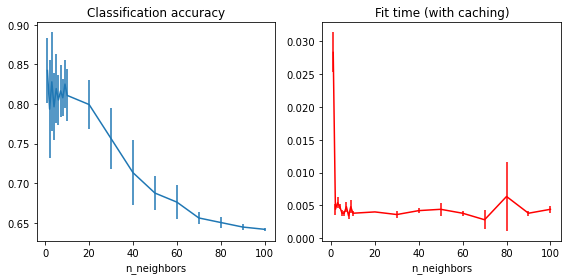

In [64]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline

print(__doc__)

#X, y = load_digits(return_X_y=True)
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9,10,20,30,40,50,60,70,80,90,100]
#n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]

# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X, y)

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
plt.show()

In [57]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.8285714285714286
mse= 0.17142857142857143
mae= 0.17142857142857143
pre= 0.8341125541125541
rec= 0.8285714285714286
elapsed time: 0.007955074310302734


In [58]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =2)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print(end - start)

accuracy = 0.8142857142857143
mse= 0.18571428571428572
mae= 0.18571428571428572
pre= 0.8337027914614121
rec= 0.8142857142857143
0.015956401824951172


In [63]:
knn = KNeighborsClassifier(n_neighbors =50)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)

accuracy = 0.7142857142857143
mse= 0.2857142857142857
mae= 0.2857142857142857
pre= 0.7995735607675906
rec= 0.7142857142857143


In [62]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =100)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.6714285714285714
mse= 0.32857142857142857
mae= 0.32857142857142857
pre= 0.4508163265306122
rec= 0.6714285714285714
elapsed time: 0.009938478469848633


C:\Users\shenl\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
import time
start = time.time()
knn = KNeighborsClassifier(n_neighbors =18)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predict)
mse= mean_squared_error(y_test, knn_predict)
mae = mean_absolute_error(y_test, knn_predict)
pre = precision_score(y_test, knn_predict, average = 'weighted')
rec = recall_score(y_test, knn_predict, average = 'weighted')
print("accuracy =", knn_accuracy)
print("mse=", mse)
print("mae=", mae)
print("pre=", pre)
print("rec=", rec)
end = time.time()
print("elapsed time:", end - start)

accuracy = 0.8
mse= 0.2
mae= 0.2
pre= 0.8080971659919028
rec= 0.8
elapsed time: 0.008941173553466797


# Comparison between classification methods

<function matplotlib.pyplot.show(close=None, block=None)>

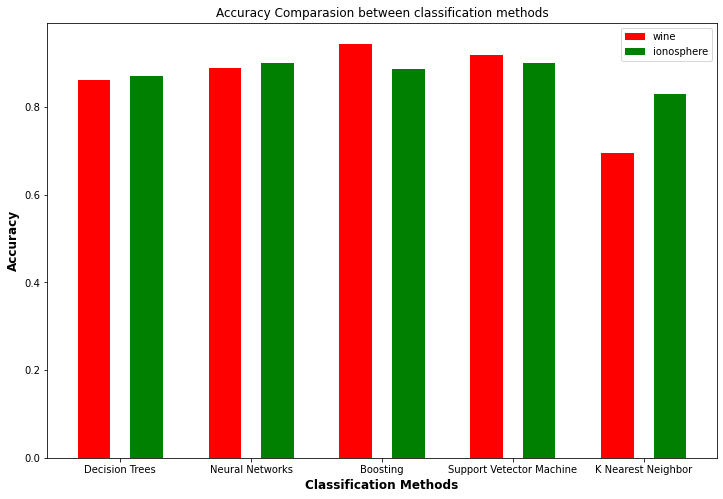

In [29]:
#sete width of bar
barWidth = 0.25
fig = plt.subplots(figsize = (12, 8))
wine_accuracy=[0.861, 0.889, 0.944, 0.917, 0.694]
Ionosphere_accuracy = [0.871, 0.9, 0.886, 0.9, 0.829]
X = ['Decision Trees', 'Neural Networks', 'Boosting', 'Support Vetector Machine', 'K Nearest Neighbor']

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2, wine_accuracy, color = 'r', width = barWidth,  label = 'wine')
plt.bar(X_axis + 0.2, Ionosphere_accuracy, color = 'g', width = barWidth,  label = 'ionosphere')

plt.xticks(X_axis, X)
plt.xlabel('Classification Methods', fontweight = 'bold', fontsize = 12)
plt.ylabel('Accuracy', fontweight = 'bold', fontsize = 12)
plt.title('Accuracy Comparasion between classification methods')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

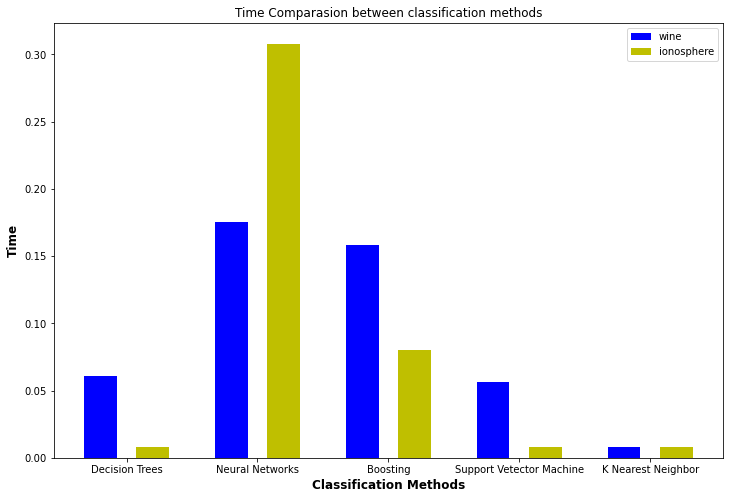

In [30]:
#sete width of bar
barWidth = 0.25
fig = plt.subplots(figsize = (12, 8))
wine_time=[0.061, 0.175, 0.158, 0.056, 0.008]
Ionosphere_time = [0.008, 0.308, 0.08, 0.008, 0.008]
X = ['Decision Trees', 'Neural Networks', 'Boosting', 'Support Vetector Machine', 'K Nearest Neighbor']

X_axis = np.arange(len(X))

plt.bar(X_axis -0.2, wine_time, color = 'b', width = barWidth,  label = 'wine')
plt.bar(X_axis + 0.2, Ionosphere_time, color = 'y', width = barWidth,  label = 'ionosphere')

plt.xticks(X_axis, X)
plt.xlabel('Classification Methods', fontweight = 'bold', fontsize = 12)
plt.ylabel('Time', fontweight = 'bold', fontsize = 12)
plt.title('Time Comparasion between classification methods')
plt.legend()
plt.show